<a href="https://colab.research.google.com/github/Nirav-Madhani/kMeans/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def dist(a,b):
  return np.linalg.norm(a-b)

In [25]:
data = np.array([
        [2,2,8,5,7,6,1,4],
        [10,5,4,8,5,4,2,9]        
        ]).T
df = pd.DataFrame(data)
data

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

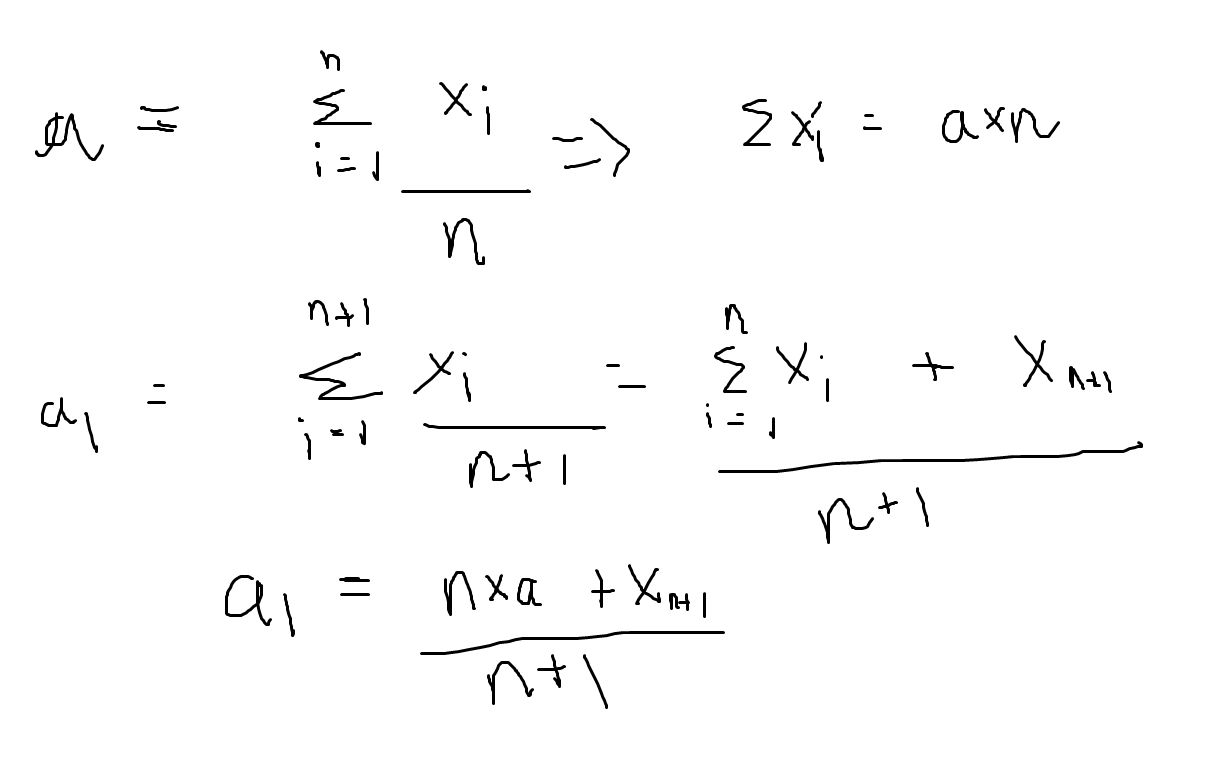

In [4]:
def cumAverage(x,y,x1,y1,n):
  return (x*n+x1)/(n+1),(y*n+y1)/(n+1)

In [5]:
#Was K nearest neighbours
def applyK(point ,points,k):
  distances = []
  for i in range(len(points)):
    distances.extend([  (dist(point,pt),i) for pt in points[i] ])
  distances = sorted(distances)
  counts = [i for (_,i) in distances[0:k]]  
  return max(counts,key=counts.count)

In [6]:
clusters = 3
centers = []
points = [[],[],[]]
epoch =1 
for i in range(3):
  centers.append(data[i])
  points[i].append(data[i])
for i in range(3,len(data)):
  j =  np.argmin([dist(data[i],center) for center in centers])
  #j = applyK(data[i],points,2)
  centers[j] = cumAverage(centers[j][0],centers[j][1],data[i][0],data[i][1],len(points[j]))  
  points[j].append(data[i])

while epoch > 1:
  epocg-=1
  points = [[],[],[]]
  for i in range(3,len(data)):
    j =  np.argmin([dist(data[i],center) for center in centers])
    #j = applyK(data[i],points,2)
    centers[j] = cumAverage(centers[j][0],centers[j][1],data[i][0],data[i][1],len(points[j]))  
    points[j].append(data[i])

print(points)
centers

[[array([ 2, 10]), array([5, 8]), array([4, 9])], [array([2, 5]), array([1, 2])], [array([8, 4]), array([7, 5]), array([6, 4])]]


[(3.6666666666666665, 9.0), (1.5, 3.5), (7.0, 4.333333333333333)]

In [7]:
convert = np.array([np.array([list(a) for a in point]) for point in points])
convert

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([array([[ 2, 10],
       [ 5,  8],
       [ 4,  9]]),
       array([[2, 5],
       [1, 2]]),
       array([[8, 4],
       [7, 5],
       [6, 4]])], dtype=object)

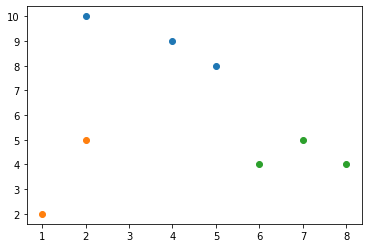

In [8]:
plt.scatter(convert[0][:,0],convert[0][:,1])
plt.scatter(convert[1][:,0],convert[1][:,1])
plt.scatter(convert[2][:,0],convert[2][:,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


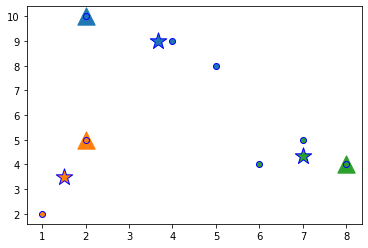

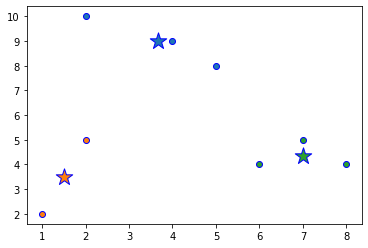

In [9]:
def KMeans(clusters,epoch,data):
  points = [[] for _ in range(clusters)]
  centers = []
  for i in range(clusters):
    centers.append(data[i])
    points[i].append(data[i])
  [plt.scatter(x,y,marker='^',s=300) for (x,y) in centers]
  plt.gca().set_prop_cycle(None)
  for i in range(clusters,len(data)):
    j =  np.argmin([dist(data[i],center) for center in centers])
    #j = applyK(data[i],points,2)
    centers[j] = cumAverage(centers[j][0],centers[j][1],data[i][0],data[i][1],len(points[j]))  
    points[j].append(data[i])
  convert = np.array([np.array([list(a) for a in point]) for point in points])
  [plt.scatter(convert[i][:,0],convert[i][:,1],edgecolors='b') for i in range(len(convert))]
  plt.gca().set_prop_cycle(None)
  [plt.scatter(x,y,marker='*',s=300,edgecolors='b') for (x,y) in centers]
  plt.gca().set_prop_cycle(None) 
  #print(len(centers))
  while epoch > 1:
    plt.figure()
    #[plt.scatter(x,y,marker='^',s=300) for (x,y) in centers]
    plt.gca().set_prop_cycle(None)
    epoch-=1
    points = [[] for cent in centers]
    #print("|",centers,"|")
    for i in range(len(data)):
      j =  np.argmin([dist(data[i],center) for center in centers])
      #j = applyK(data[i],points,2)
      centers[j] = cumAverage(centers[j][0],centers[j][1],data[i][0],data[i][1],len(points[j]))  
      points[j].append(data[i])
    convert = np.array([np.array([list(a) for a in point]) for point in points])
    [plt.scatter(x,y,marker='*',s=300,edgecolors='b') for (x,y) in centers]
    plt.gca().set_prop_cycle(None)    
    [plt.scatter(convert[i][:,0],convert[i][:,1],edgecolors='b') for i in range(len(convert))]
    plt.gca().set_prop_cycle(None)
  #print(len(centers))
  #print(points)
  #centers
KMeans(3,2,data)

## Real World

In [34]:
data1 = pd.read_csv('star.csv')
data1 = data1[['Temperature (K)','Radius(R/Ro)']]#,'Luminosity(L/Lo)']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


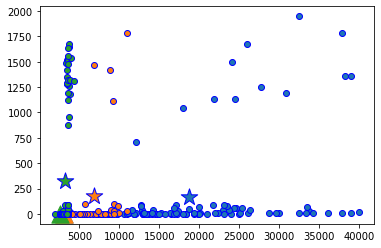

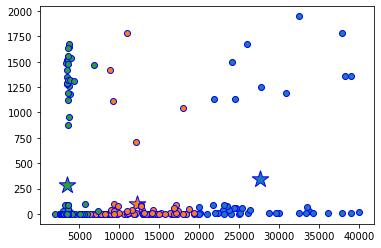

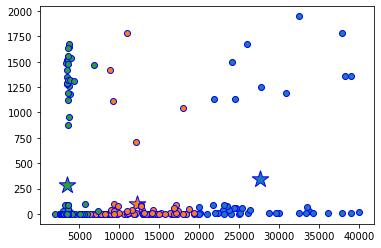

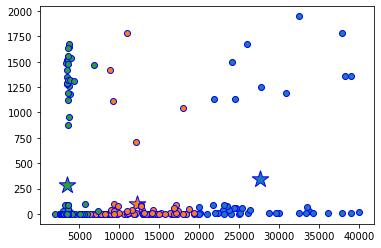

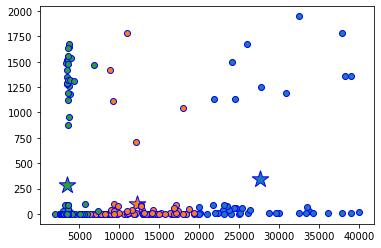

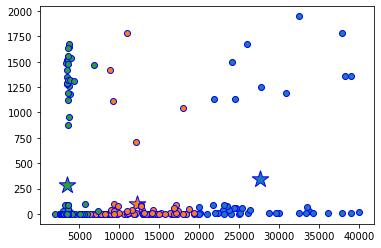

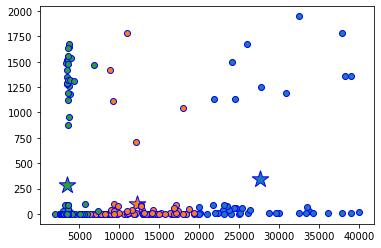

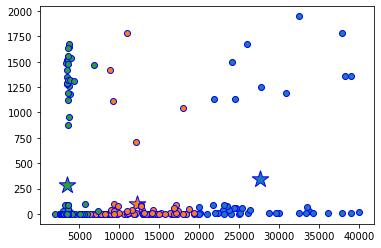

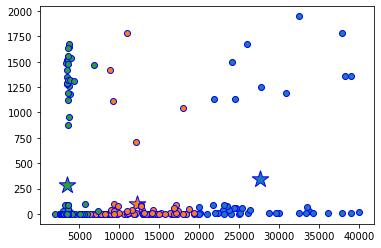

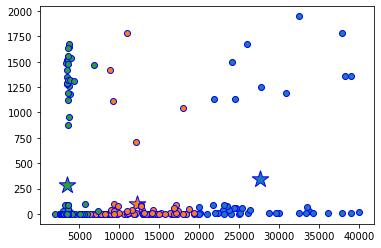

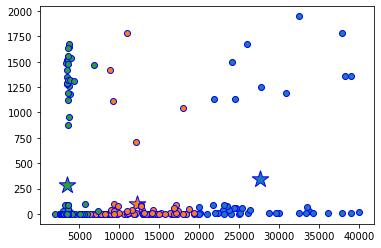

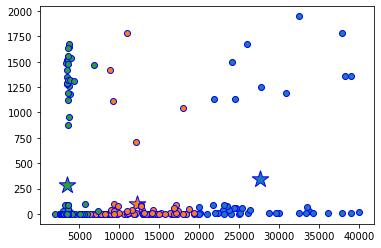

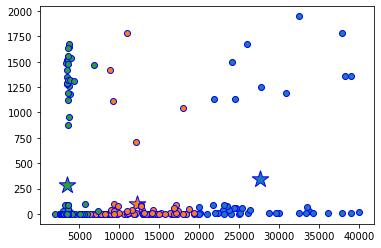

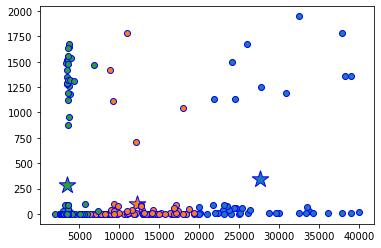

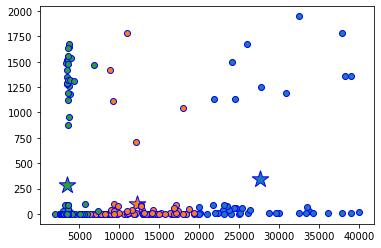

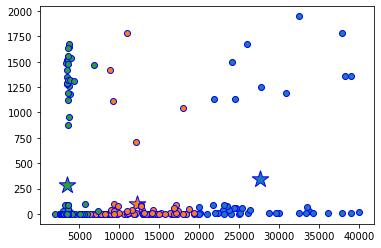

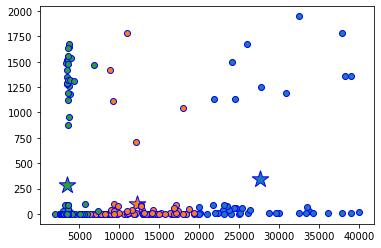

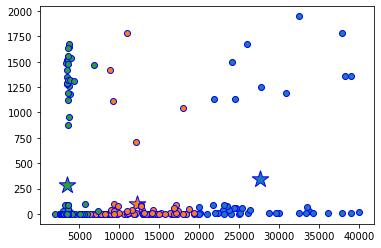

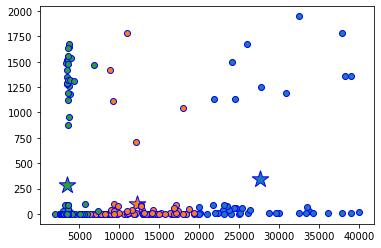

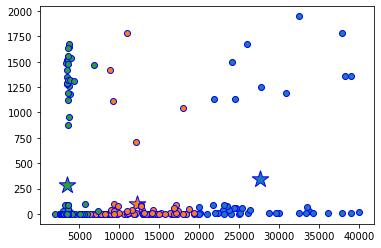

In [35]:
KMeans(3,20,np.array(data1))

## Conclusion

The starting point is very important factor in determining the clusters 